In [159]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf as sql

In [160]:
import warnings
warnings.filterwarnings('ignore')

In [161]:
df = pd.read_csv("aerofit_treadmill.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [162]:
# check for null
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [164]:
'''
check if each row and column contains at least one missing value.
By default, it is applied to columns. If the argument axis=1, it is applied to rows
'''
df.isnull().any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

In [165]:
df.describe(include="object")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


## Univariate Analysis 
* Objective of this part is to gain a preliminary insight of what is the usage pattern of Treadmill

(array([17., 37., 44., 22., 18., 17., 13.,  3.,  4.,  5.]),
 array([18. , 21.2, 24.4, 27.6, 30.8, 34. , 37.2, 40.4, 43.6, 46.8, 50. ]),
 <a list of 10 Patch objects>)

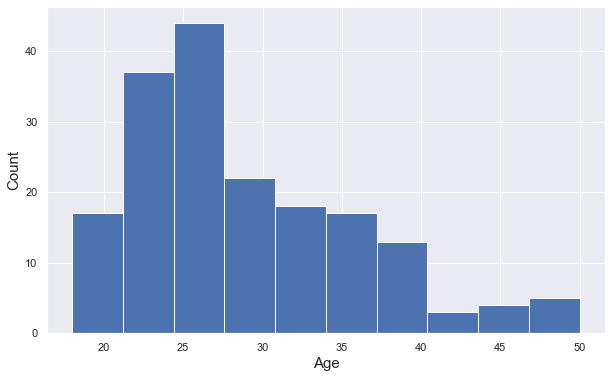

In [166]:
# According to Age 
sns.set(rc = {'figure.figsize':(10,6)})
plt.xlabel("Age", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.hist(df["Age"])

* Early 20 to 30 year old are the major buyer

In [167]:
# age = sql("select count(*) as count from df where Age > 40")
# age

(array([ 2.,  0., 26.,  0.,  0., 97.,  0., 24.,  0., 31.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

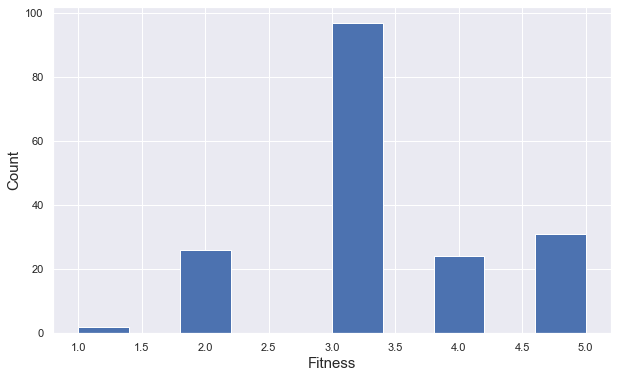

In [168]:
# According to Fitness Level
sns.set(rc = {'figure.figsize':(10,6)})
plt.xlabel("Fitness", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.hist(df["Fitness"])

* Fittest people are not the most frequent buyer, fittest people prefer gym probably

(array([33.,  0., 69.,  0., 52.,  0., 17.,  0.,  7.,  2.]),
 array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ]),
 <a list of 10 Patch objects>)

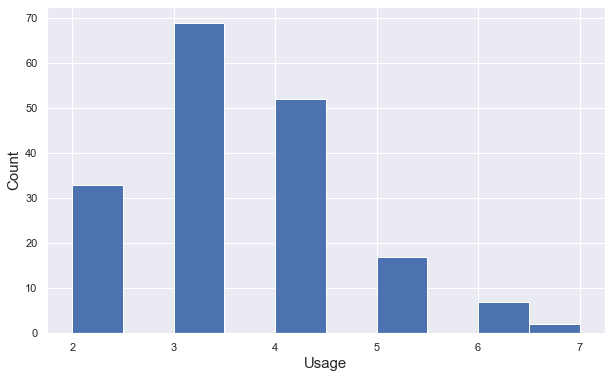

In [169]:
# According to Usage
sns.set(rc = {'figure.figsize':(10,6)})
plt.xlabel("Usage", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.hist(df["Usage"])

* People who use more have more time use trademill every day - they probably prefer gym 
* People with moderate / major time constraint prefer to keep a treadmill at home

(array([23., 26., 48., 41., 15.,  5.,  3.,  5., 10.,  4.]),
 array([ 29562. ,  37063.9,  44565.8,  52067.7,  59569.6,  67071.5,
         74573.4,  82075.3,  89577.2,  97079.1, 104581. ]),
 <a list of 10 Patch objects>)

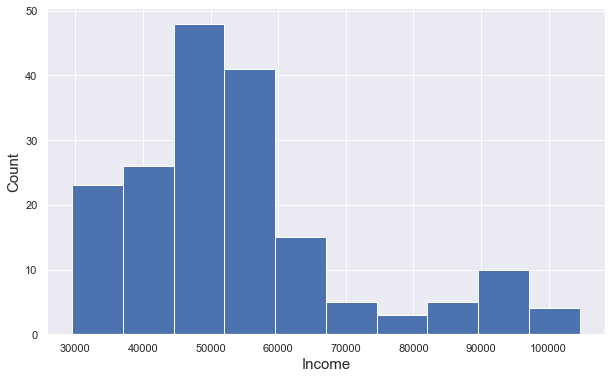

In [170]:
# According to Income Level
sns.set(rc = {'figure.figsize':(10,6)})
plt.xlabel("Income", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.hist(df["Income"])

* This trend is surprising but if we think deep, not many people exist in the higher income category 
* Hence we observe more purchase in lower to mid level income group

In [171]:
# rich=sql("select count(*) from df where Income > 70000")
# rich

(array([24., 63., 51., 14., 16.,  7.,  1.,  2.,  1.,  1.]),
 array([ 21. ,  54.9,  88.8, 122.7, 156.6, 190.5, 224.4, 258.3, 292.2,
        326.1, 360. ]),
 <a list of 10 Patch objects>)

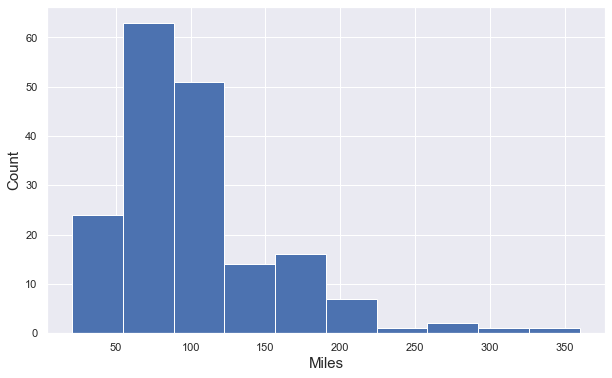

In [172]:
# According to distance ran/walked
sns.set(rc = {'figure.figsize':(10,6)})
plt.xlabel("Miles", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.hist(df["Miles"])

* High utilization is rarely observed in people purchasing the product
* Then again not too many people can cover beyond 200 miles per week 

In [173]:
# Most popular product 
# m_partenred = sql("select * from df_im where Lower(Trim(Gender)) = 'male' and Lower(Trim(MaritalStatus))='partnered'")
# count_mpartnered = sql("select count(*) as count,Product as Product from m_partenred group by Product")
# count_mpartnered

In [174]:
count_gender = sql("select Gender , count(*) as count,Product as Product from df group by Gender , Product")
count_gender

,Gender,count,Product
0,Female,40,KP281
1,Female,29,KP481
2,Female,7,KP781
3,Male,40,KP281
4,Male,31,KP481
5,Male,33,KP781


* Male are major user 
* We observe that cheaper product has higher sale among both gender

In [175]:
count_partnered = sql("select Gender ,MaritalStatus , count(*) as count,Product as Product from df group by Gender,MaritalStatus, Product")
count_partnered

,Gender,MaritalStatus,count,Product
0,Female,Partnered,27,KP281
1,Female,Partnered,15,KP481
2,Female,Partnered,4,KP781
3,Female,Single,13,KP281
4,Female,Single,14,KP481
5,Female,Single,3,KP781
6,Male,Partnered,21,KP281
7,Male,Partnered,21,KP481
8,Male,Partnered,19,KP781
9,Male,Single,19,KP281


* Gender , MaritalStatus have no significant effect 
* Price sensitivity is the only characteristic repeated

# BIVARIATE AANALYSIS 

In [176]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Comparison of Pearson and Spearman coefficients
1. The fundamental difference between the two correlation coefficients is that the Pearson coefficient works with a linear relationship between the two variables whereas the Spearman Coefficient works with monotonic relationships as well.
2. One more difference is that Pearson works with raw data values of the variables whereas Spearman works with rank-ordered variables

https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8#:~:text=Comparison%20of%20Pearson%20and%20Spearman,with%20monotonic%20relationships%20as%20well.

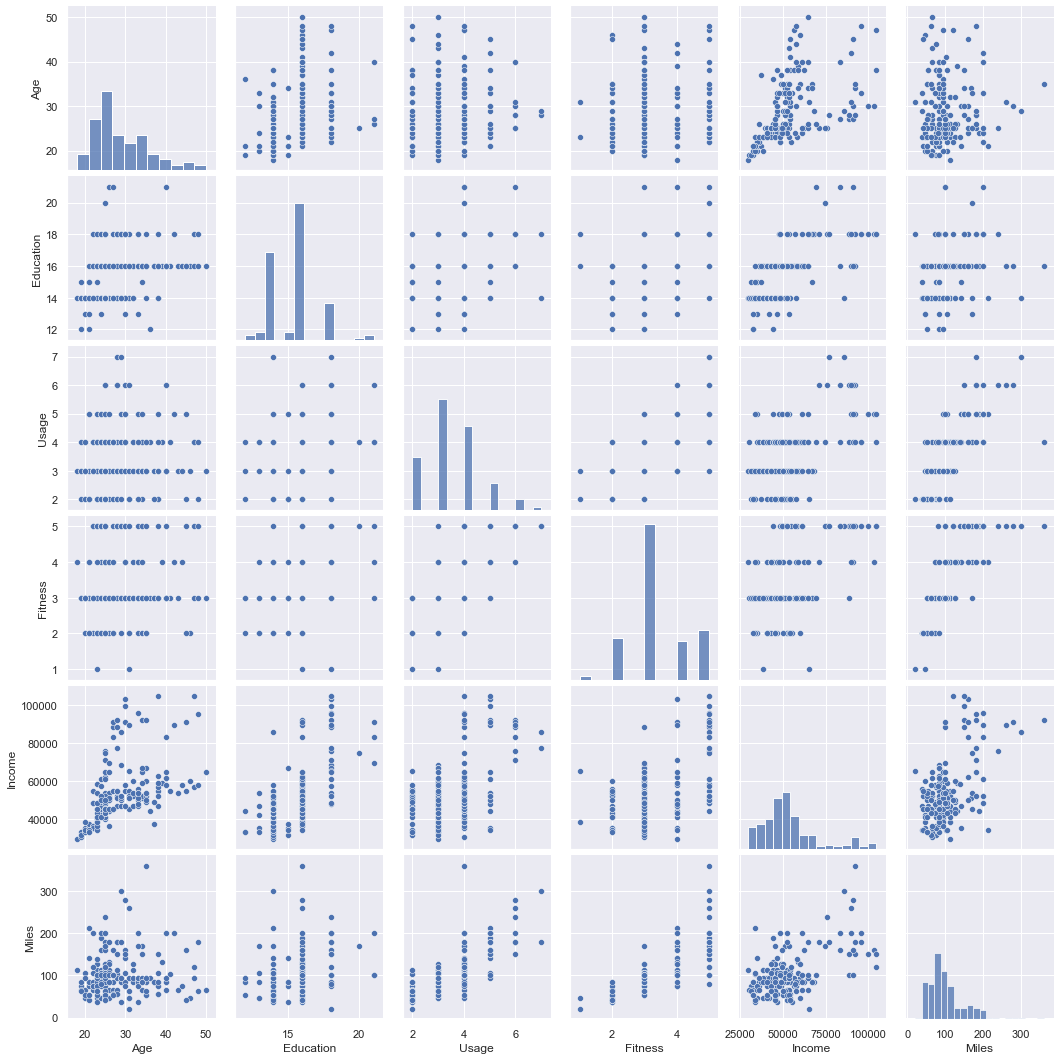

In [177]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.pairplot(df)
plt.show()

* We observe age, education have high correlation with income.
* Miles have high correlation with usage and fitness

# Prepare the data 
* Add categories
* Drop Outliers 

In [178]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


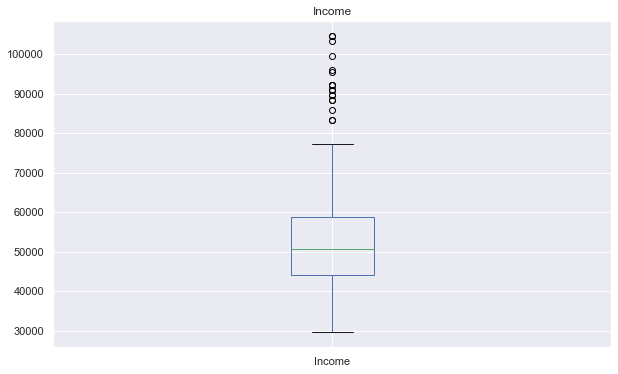

In [179]:
sns.set(rc = {'figure.figsize':(10,6)})
#sns.set_style("whitegrid")
df['Income'].plot(kind='box', title='Income')

## income outlier detection 

In [180]:

import numpy as np
Q1 = np.percentile(df['Income'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Income'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
#print("Old Shape: ", male.shape)
 
# Upper bound
upper = Q3+1.5*IQR
# Lower bound
lower = Q1-1.5*IQR
print(upper , lower)

81388.25 21206.25


In [181]:
df_income = df[(df["Income"] >= lower) & (df["Income"]<=upper)]
max(df_income['Income'])

77191

In [182]:
df_income['Income_group'] = "Z"
df_income.loc[df_income['Income'].between(30000, 40000, inclusive=True), 'Income_group'] = 'A'
df_income.loc[df_income['Income'].between(40000, 50000, inclusive=False), 'Income_group'] = 'B'
df_income.loc[df_income['Income'].between(50000, 60000, inclusive=False), 'Income_group'] = 'C'
df_income.loc[df_income['Income'].between(60000, 70000, inclusive=False), 'Income_group'] = 'D'
df_income.loc[df_income['Income'].between(70000, 80000, inclusive=False), 'Income_group'] = 'E'
df_income.loc[df_income['Income']> 80000, 'Income_group'] = 'F'

In [183]:
df_income

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_group
0,KP281,18,Male,14,Single,3,4,29562,112,Z
1,KP281,19,Male,15,Single,2,3,31836,75,A
2,KP281,19,Female,14,Partnered,4,3,30699,66,A
3,KP281,19,Male,12,Single,3,3,32973,85,A
4,KP281,20,Male,13,Partnered,4,2,35247,47,A
...,...,...,...,...,...,...,...,...,...,...
156,KP781,25,Male,20,Partnered,4,5,74701,170,E
157,KP781,26,Female,21,Single,4,3,69721,100,D
158,KP781,26,Male,16,Partnered,5,4,64741,180,D
163,KP781,28,Male,18,Partnered,7,5,77191,180,E


## Miles outlier detection

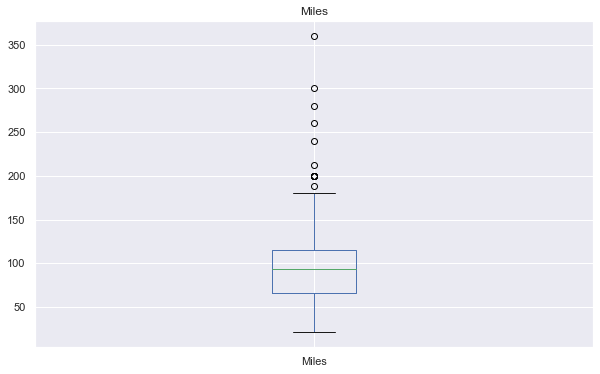

In [184]:
sns.set(rc = {'figure.figsize':(10,6)})
#sns.set_style("whitegrid")
df['Miles'].plot(kind='box', title='Miles')

In [185]:
Q1 = np.percentile(df_income['Miles'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_income['Miles'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
# Upper bound
upper = Q3+1.5*IQR
# Lower bound
lower = Q1-1.5*IQR
if lower < 0:
    lower = 0 
print(upper , lower)

166.0 6.0


In [186]:
df_im = df_income[(df_income["Miles"] >= lower) & (df_income["Miles"]<=upper)]
df_im

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_group
0,KP281,18,Male,14,Single,3,4,29562,112,Z
1,KP281,19,Male,15,Single,2,3,31836,75,A
2,KP281,19,Female,14,Partnered,4,3,30699,66,A
3,KP281,19,Male,12,Single,3,3,32973,85,A
4,KP281,20,Male,13,Partnered,4,2,35247,47,A
...,...,...,...,...,...,...,...,...,...,...
149,KP781,24,Male,16,Single,5,5,49801,160,B
150,KP781,25,Male,16,Partnered,4,5,49801,120,B
151,KP781,25,Male,16,Partnered,4,4,62251,160,D
153,KP781,25,Male,18,Partnered,4,3,64741,100,D


In [187]:
print(max(df_im["Miles"]))
print(min(df_im["Miles"]))
# 60 , 90 ,120 , 

160
21


In [188]:
df_im['Miles_group'] = "Z"
df_im.loc[df_im['Miles'].between(20, 60, inclusive=True), 'Miles_group'] = 'A'
df_im.loc[df_im['Miles'].between(60, 90, inclusive=False), 'Miles_group'] = 'B'
df_im.loc[df_im['Miles'].between(90, 1200, inclusive=False), 'Miles_group'] = 'C'
df_im.loc[df_im['Miles'].between(120, 150, inclusive=False), 'Miles_group'] = 'D'
df_im.loc[df_im['Miles']> 150, 'Miles_group'] = 'E'

In [189]:
df_im

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_group,Miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Z,C
1,KP281,19,Male,15,Single,2,3,31836,75,A,B
2,KP281,19,Female,14,Partnered,4,3,30699,66,A,B
3,KP281,19,Male,12,Single,3,3,32973,85,A,B
4,KP281,20,Male,13,Partnered,4,2,35247,47,A,A
...,...,...,...,...,...,...,...,...,...,...,...
149,KP781,24,Male,16,Single,5,5,49801,160,B,E
150,KP781,25,Male,16,Partnered,4,5,49801,120,B,C
151,KP781,25,Male,16,Partnered,4,4,62251,160,D,E
153,KP781,25,Male,18,Partnered,4,3,64741,100,D,C


In [190]:
# min(df_im["Age"])

In [191]:
# max(df_im["Age"])

## Try to understand if income and Age have any effect on model preference

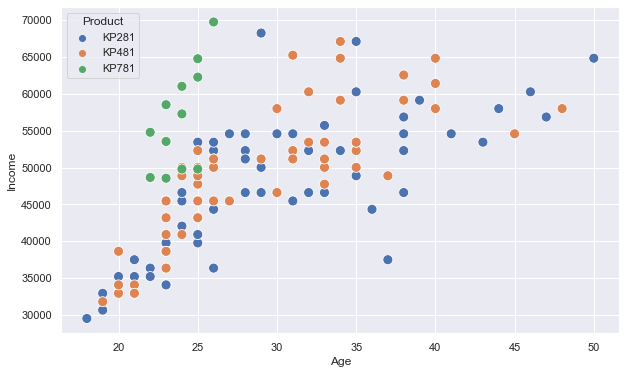

In [192]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.scatterplot(x=df_im["Age"],y=df_im["Income"],hue=df_im["Product"],s=100)

* Majority of expensive model is purchased by individuals below or around 25 age group having income around 50k or more
* Beyond 30 use of trademill across all income group starts thinning 
* KP281 , KP481 seems to be preferred by people across age and income group

# Model preference 
1. Gender
2. Gender and income group

In [193]:
# find categories in Male  df_im_im
male = sql("select * from df_im where Lower(Trim(Gender)) = 'male'")
m_single = sql("select * from df_im where Lower(Trim(Gender)) = 'male' and Lower(Trim(MaritalStatus))='single'")
m_partenred = sql("select * from df_im where Lower(Trim(Gender)) = 'male' and Lower(Trim(MaritalStatus))='partnered'")
m_partenred.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_group,Miles_group
0,KP281,20,Male,13,Partnered,4,2,35247,47,A,A
1,KP281,23,Male,16,Partnered,3,1,38658,47,A,A
2,KP281,23,Male,16,Partnered,3,3,40932,75,B,B
3,KP281,23,Male,16,Partnered,4,3,39795,94,A,C
4,KP281,24,Male,13,Partnered,3,2,42069,47,B,A


In [194]:
count_partner= sql("select count(*) as count,Product as Product from m_partenred group by Product")
count_partner


,count,Product
0,21,KP281
1,19,KP481
2,4,KP781


In [195]:
count_msingle= sql("select count(*) as count,Product as Product from m_single group by Product")
count_msingle

,count,Product
0,18,KP281
1,10,KP481
2,6,KP781


In [196]:
'''Displot
It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.'''

'Displot\nIt is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.'

In [197]:
# brand preferance 
df_temp=sql("select count(*) as count , Product , Income_group from df_im group by Product ,Income_group order by Income_group")
df_temp

,count,Product,Income_group
0,22,KP281,A
1,8,KP481,A
2,24,KP281,B
3,20,KP481,B
4,4,KP781,B
5,25,KP281,C
6,22,KP481,C
7,4,KP781,C
8,6,KP281,D
9,7,KP481,D


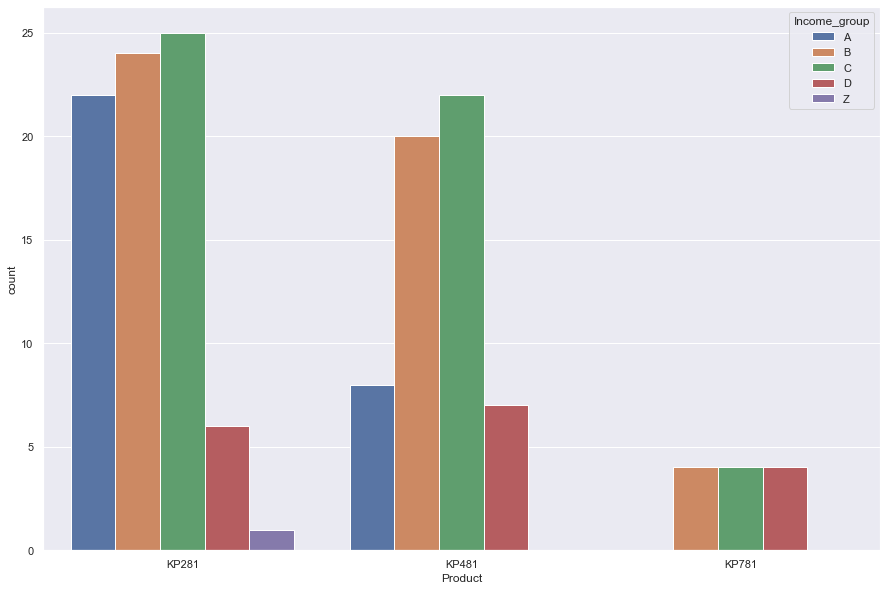

"\nIncome :\nLower than 30000 = Z\nbetween(30000, 40000), 'Income_group' = 'A'\nbetween(40000, 50000), 'Income_group' = 'B'\nbetween(50000, 60000), 'Income_group' = 'C'\nbetween(60000, 70000), 'Income_group' = 'D'\nbetween(70000, 80000), 'Income_group' = 'E'\nIncome > 80000, 'Income_group' = 'F'\n"

In [198]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.barplot(x="Product", y="count", hue="Income_group", data=df_temp)
plt.show()
'''
Income :
Lower than 30000 = Z
between(30000, 40000), 'Income_group' = 'A'
between(40000, 50000), 'Income_group' = 'B'
between(50000, 60000), 'Income_group' = 'C'
between(60000, 70000), 'Income_group' = 'D'
between(70000, 80000), 'Income_group' = 'E'
Income > 80000, 'Income_group' = 'F'
'''

* 5000-6000 income group is the major buyer 

In [199]:
# based on usage 
df_temp=sql("select count(*) as count , Product , Miles_group from df_im group by Product ,Miles_group order by Miles_group")
df_temp

,count,Product,Miles_group
0,18,KP281,A
1,12,KP481,A
2,36,KP281,B
3,20,KP481,B
4,1,KP781,B
5,20,KP281,C
6,20,KP481,C
7,8,KP781,C
8,4,KP281,D
9,5,KP481,D


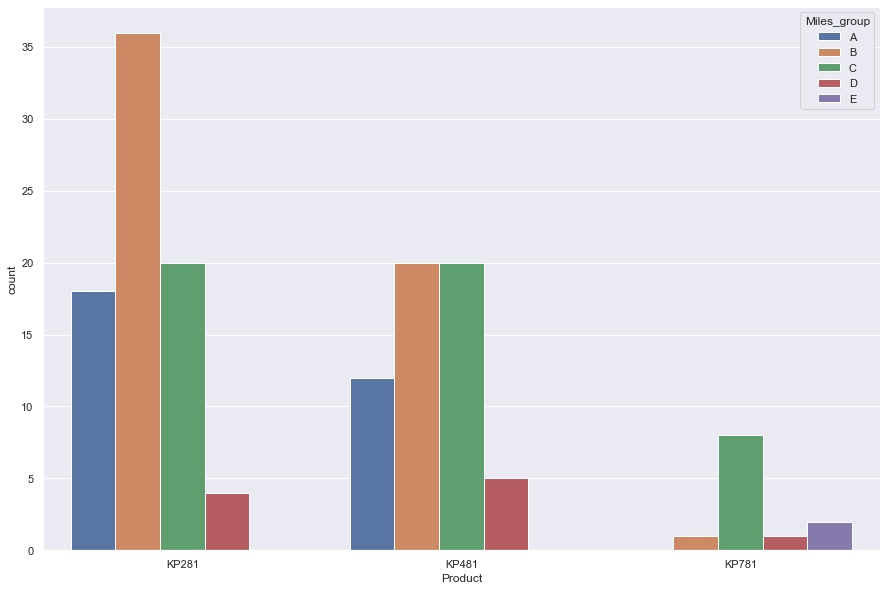

'\ndf_im[\'Miles_group\'] = "Z"\ndf_im.loc[df_im[\'Miles\'].between(20, 60, inclusive=True), \'Miles_group\'] = \'A\'\ndf_im.loc[df_im[\'Miles\'].between(60, 90, inclusive=False), \'Miles_group\'] = \'B\'\ndf_im.loc[df_im[\'Miles\'].between(90, 1200, inclusive=False), \'Miles_group\'] = \'C\'\ndf_im.loc[df_im[\'Miles\'].between(120, 150, inclusive=False), \'Miles_group\'] = \'D\'\ndf_im.loc[df_im[\'Miles\']> 150, \'Miles_group\'] = \'E\'\n'

In [200]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.barplot(x="Product", y="count", hue="Miles_group", data=df_temp)
plt.show()
'''
['Miles'.between(20, 60), 'Miles_group' = 'A'
['Miles'.between(60, 90), 'Miles_group' = 'B'
['Miles'.between(90, 1200), 'Miles_group' = 'C'
['Miles'.between(120, 150), 'Miles_group' = 'D'
['Miles'> 150, 'Miles_group' = 'E'
'''

* The most expensive model is purchased by the high runner group 
* Least frequent user never go for the most expensive model, they prefer cheapest model

# Let us understand the probabilities

In [201]:
df_im.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_group,Miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Z,C
1,KP281,19,Male,15,Single,2,3,31836,75,A,B
2,KP281,19,Female,14,Partnered,4,3,30699,66,A,B
3,KP281,19,Male,12,Single,3,3,32973,85,A,B
4,KP281,20,Male,13,Partnered,4,2,35247,47,A,A


In [202]:
x=sql("select count(*) as count from df_im")
total = x["count"]
x=sql("select count(*) as count from df_im where MaritalStatus = 'Single' and Gender = 'Male'")
single_m = x["count"]
x=sql("select count(*) as count from df_im where MaritalStatus = 'Single' and Gender = 'Female'")
single_f = x["count"]

In [203]:
# P(single male / buying treadmill) = 
single_m / total

0    0.231293
Name: count, dtype: float64

* Probability of single male buying is = 0.231293

In [204]:
# P(single female / buying treadmill) = 
single_f / total

0    0.197279
Name: count, dtype: float64

* Probability of single female buying is = 0.197279

In [205]:
#probability of single buying  treadmill 
(single_f + single_m) / total

0    0.428571
Name: count, dtype: float64

* probability of single individual buying =  0.428571

In [206]:
x=sql("select count(*) as count from df_im where MaritalStatus = 'Partnered' and Gender = 'Male'")
Partnered_m = x["count"]
x=sql("select count(*) as count from df_im where MaritalStatus = 'Partnered' and Gender = 'Female'")
Partnered_f = x["count"]

In [207]:
# P(Partnered male / buying treadmill) = 
Partnered_m / total

0    0.29932
Name: count, dtype: float64

In [208]:
# P(Partnered female / buying treadmill) = 
Partnered_f / total

0    0.272109
Name: count, dtype: float64

In [209]:
#probability of partnered buying  treadmill 
(Partnered_f + Partnered_m) / total

0    0.571429
Name: count, dtype: float64

## Summary 
* Probability of partnered male buying is = 0.29932
* Probability of partnered female buying is = 0.272109
* probability of partnered buying  treadmill = 0.571429
* Probability of single male buying is = 0.231293
* Probability of single female buying is = 0.197279
* probability of single buying  treadmill = 0.428571

# Probability of buying different model 
* probability of buying KP281 given individual is 
- male
- married
- Salary > 50000

In [210]:
x=sql("select count(*) as count from df_im where MaritalStatus = 'Partnered' and Gender = 'Male' and Income > 50000 and Product = 'KP281' ")
event = x["count"]
x=sql("select count(*) as count from df_im where MaritalStatus = 'Partnered' and Gender = 'Male' and Income > 50000")
total = x["count"]

In [211]:
event/total

0    0.423077
Name: count, dtype: float64

* probability of buying KP281 given individual is
* Female
* married
* Salary > 50000

In [212]:
x=sql("select count(*) as count from df_im where MaritalStatus = 'Partnered' and Gender = 'Female' and Income > 50000 and Product = 'KP281' ")
event = x["count"]
x=sql("select count(*) as count from df_im where MaritalStatus = 'Partnered' and Gender = 'Female' and Income > 50000")
total = x["count"]
event/total

0    0.555556
Name: count, dtype: float64

* probability of buying KP481 given individual is
* Male
* married
* Salary > 50000

In [213]:
x=sql("select count(*) as count from df_im where MaritalStatus = 'Partnered' and Gender = 'Male' and Income > 50000 and Product = 'KP481' ")
event = x["count"]
x=sql("select count(*) as count from df_im where MaritalStatus = 'Partnered' and Gender = 'Male' and Income > 50000")
total = x["count"]
event/total

0    0.461538
Name: count, dtype: float64

* probability of buying KP481 given individual is
* Female
* married
* Salary > 50000

In [214]:
x=sql("select count(*) as count from df_im where MaritalStatus = 'Partnered' and Gender = 'Female' and Income > 50000 and Product = 'KP481' ")
event = x["count"]
x=sql("select count(*) as count from df_im where MaritalStatus = 'Partnered' and Gender = 'Female' and Income > 50000")
total = x["count"]
event/total

0    0.444444
Name: count, dtype: float64

* probability of buying KP781 given individual is
* male
* married
* Salary > 50000

In [215]:
x=sql("select count(*) as count from df_im where MaritalStatus = 'Partnered' and Gender = 'Male' and Income > 50000 and Product = 'KP781' ")
event = x["count"]
x=sql("select count(*) as count from df_im where MaritalStatus = 'Partnered' and Gender = 'Male' and Income > 50000")
total = x["count"]
event/total

0    0.115385
Name: count, dtype: float64

* probability of buying KP781 given individual is
* Female
* married
* Salary > 50000

In [216]:
x=sql("select count(*) as count from df_im where MaritalStatus = 'Partnered' and Gender = 'Female' and Income > 50000 and Product = 'KP781' ")
event = x["count"]
x=sql("select count(*) as count from df_im where MaritalStatus = 'Partnered' and Gender = 'Female' and Income > 50000")
total = x["count"]
event/total

0    0.0
Name: count, dtype: float64

# probability of single buying 

In [217]:
x=sql("select count(*) as count from df_im where MaritalStatus = 'Partnered' ")
event = x["count"]
x=sql("select count(*) as count from df_im")
total = x["count"]
event/total

0    0.571429
Name: count, dtype: float64

# probability of partnered buying

In [218]:
1- event/total

0    0.428571
Name: count, dtype: float64

In [219]:
df_im

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_group,Miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Z,C
1,KP281,19,Male,15,Single,2,3,31836,75,A,B
2,KP281,19,Female,14,Partnered,4,3,30699,66,A,B
3,KP281,19,Male,12,Single,3,3,32973,85,A,B
4,KP281,20,Male,13,Partnered,4,2,35247,47,A,A
...,...,...,...,...,...,...,...,...,...,...,...
149,KP781,24,Male,16,Single,5,5,49801,160,B,E
150,KP781,25,Male,16,Partnered,4,5,49801,120,B,C
151,KP781,25,Male,16,Partnered,4,4,62251,160,D,E
153,KP781,25,Male,18,Partnered,4,3,64741,100,D,C


In [220]:
ndf= pd.crosstab([df_im.Product], [df_im.Gender,df_im.MaritalStatus], margins=True)
ndf

Gender           Female             Male         All
MaritalStatus Partnered Single Partnered Single     
Product                                             
KP281                26     13        21     18   78
KP481                14     14        19     10   57
KP781                 0      2         4      6   12
All                  40     29        44     34  147

In [221]:
ndf= pd.crosstab([df_im.Product], [df_im.Gender,df_im.MaritalStatus], normalize='index')
ndf

Gender           Female                Male          
MaritalStatus Partnered    Single Partnered    Single
Product                                              
KP281          0.333333  0.166667  0.269231  0.230769
KP481          0.245614  0.245614  0.333333  0.175439
KP781          0.000000  0.166667  0.333333  0.500000

# This p&c of probability calculation can go on forever
* let us stop here 